<a href="https://colab.research.google.com/github/farheenfathimaa/practice/blob/main/T2T.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# T2T Introduction
This notebook is the copy of [T2T](https://colab.research.google.com/github/tensorflow/tensor2tensor/blob/master/tensor2tensor/notebooks/hello_t2t.ipynb?authuser=2#scrollTo=OJKU36QAfqOC).

This contains what i learnt about the T2T.

In [1]:
# Installing dependencies
# !pip install -q -U tensor2tensor
!pip install tensor2tensor
!pip install tensorflow matplotlib

  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of dopamine-rl to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of dopamine-rl to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 1.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of kfac to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.4/981.4 kB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 84.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

**-q (or --quiet):**

>This flag is used to suppress output from pip during installation.

In [2]:
!pip uninstall tensorflow -y
!pip install tensorflow==2.15.0

!pip uninstall tensorflow-addons -y

!pip install keras --upgrade

Found existing installation: tensorflow 2.17.0
Uninstalling tensorflow-2.17.0:
  Successfully uninstalled tensorflow-2.17.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.0 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling

In [3]:
# Installing dependencies
!pip install tensor2tensor
# !pip install tensorflow matplotlib

# Imports
import sys
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

# Check TensorFlow version
print("TensorFlow version:", tf.__version__)

# Tensor2Tensor imports
from tensor2tensor import models  # T2T pre-built models
from tensor2tensor import problems  # T2T dataset problems
from tensor2tensor.layers import common_layers
from tensor2tensor.utils import trainer_lib, registry, metrics

# ModeKeys import
Modes = tf.estimator.ModeKeys

# Setup some directories
data_dir = os.path.expanduser("~/t2t/data")
tmp_dir = os.path.expanduser("~/t2t/tmp")
train_dir = os.path.expanduser("~/t2t/train")
checkpoint_dir = os.path.expanduser("~/t2t/checkpoints")

# Create directories if they do not exist
os.makedirs(data_dir, exist_ok=True)
os.makedirs(tmp_dir, exist_ok=True)
os.makedirs(train_dir, exist_ok=True)
os.makedirs(checkpoint_dir, exist_ok=True)

# Google Cloud Storage paths
gs_data_dir = "gs://tensor2tensor-data"
gs_ckpt_dir = "gs://tensor2tensor-checkpoints/"

  Using cached tensorflow_addons-0.23.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached keras-2.15.0-py3-none-any.whl.metadata (2.4 kB)
Using cached tensorflow_addons-0.23.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (611 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 88.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 104.2 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.13.0 and strictly below 2.16.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.17.1 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're u

ModuleNotFoundError: No module named 'keras.src.engine'

**What is the `collections` Module?**

>The `collections` module in Python is a powerful tool that provides specialized container datatypes. These are alternatives to the general-purpose built-in containers like dictionaries (`dict`), lists (`list`), sets (`set`), and tuples (`tuple`).

**1. `from tensor2tensor import models`**

* This line imports the `models` module from the Tensor2Tensor (T2T) library.
* **Purpose:** This module contains pre-built deep learning models that are ready to use or can be adapted for your tasks. Examples include the Transformer, ResNet, and more.

**2. `from tensor2tensor import problems`**

* This line imports the `problems` module from T2T.
* **Purpose:** This module provides access to various datasets and pre-processing routines (called "problems" in T2T). These problems encapsulate tasks like translation, image classification, and more. They handle things like downloading data, tokenization, and formatting for you.

**3. `from tensor2tensor.layers import common_layers`**

* This line imports the `common_layers` module from T2T's `layers` package.
* **Purpose:** This module contains common building blocks (layers) used in deep learning models, such as convolutional layers, attention layers, and activation functions. It helps in constructing and modifying neural networks.

**4. `from tensor2tensor.utils import trainer_lib, t2t_model, registry, metrics`**

* This line imports multiple utilities from T2T's `utils` package:
  * `trainer_lib`: Provides tools and functions for training deep learning models, including hyperparameter management and training loops.
  * `t2t_model`: Contains the base class (`T2TModel`) for building custom T2T models.
  * `registry`: A system for registering and accessing different models and problems within T2T.
  * `metrics`: Provides functions for evaluating model performance using various metrics (like accuracy, precision, etc.).

**`# Enable TF Eager execution`**

**`tfe = tf.contrib.eager`**

**`tfe.enable_eager_execution()`**

**Explanation:**

1. `tfe = tf.contrib.eager`: This line imports the `eager` module from TensorFlow and assigns it to the variable `tfe`. The `eager` module allows for immediate execution of TensorFlow operations, making debugging and development easier.
2. `tfe.enable_eager_execution()`: This line enables eager execution in TensorFlow. By default, TensorFlow uses a graph execution mode where operations are defined as a graph and then executed as a whole. Eager execution allows operations to be executed immediately, which is often more intuitive for interactive development and debugging.

**Why we use it:**
 Eager execution makes TensorFlow more interactive and user-friendly. It allows you to see the results of operations immediately, which can be helpful for debugging and experimentation. It also simplifies the development process by eliminating the need to build and execute graphs explicitly.

 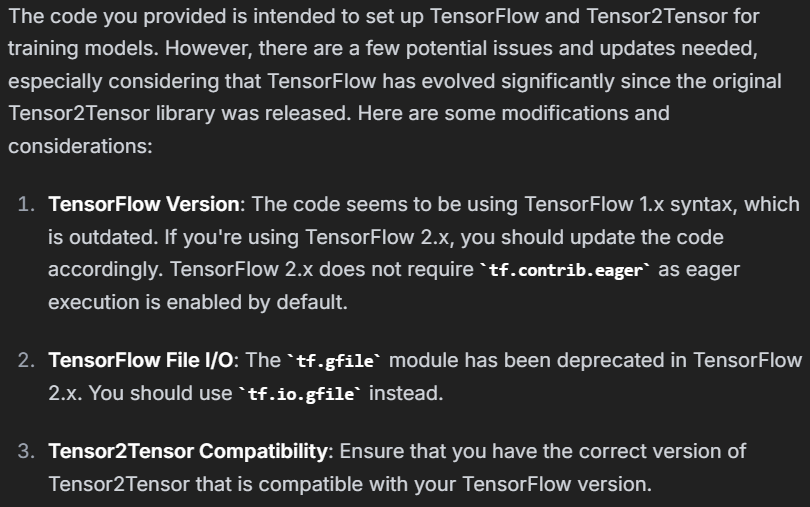

**`# Other setup`**
**`Modes = tf.estimator.ModeKeys`**

**Explanation:**
This line imports `ModeKeys` from `tf.estimator` and assigns it to the variable `Modes`. `ModeKeys` is an enumeration that defines the different modes in which a TensorFlow Estimator can operate, such as training, evaluation, and prediction.

**Why we use it:**
 `ModeKeys` provides a standardized way to specify the mode of operation for TensorFlow Estimators. This helps to ensure that the model is configured correctly for the intended task.


**`# Setup some directories`**

**`data_dir = os.path.expanduser("~/t2t/data")`**

**`tmp_dir = os.path.expanduser("~/t2t/tmp")`**

**`train_dir = os.path.expanduser("~/t2t/train")`**

**`checkpoint_dir = os.path.expanduser("~/t2t/checkpoints")`**

**`tf.gfile.MakeDirs(data_dir)`**

**`tf.gfile.MakeDirs(tmp_dir)`**

**`tf.gfile.MakeDirs(train_dir)`**

**`tf.gfile.MakeDirs(checkpoint_dir)`**

**`gs_data_dir = "gs://tensor2tensor-data"`**

**`gs_ckpt_dir = "gs://tensor2tensor-checkpoints/"`**

**Explanation:**

1. `data_dir = os.path.expanduser("~/t2t/data")`: This line defines the path to the data directory. `os.path.expanduser `expands the tilde (~) to the user's home directory.
2. `tmp_dir = os.path.expanduser("~/t2t/tmp")`: This line defines the path to the temporary directory.
3. `train_dir = os.path.expanduser("~/t2t/train")`: This line defines the path to the training directory.
4. `checkpoint_dir = os.path.expanduser("~/t2t/checkpoints")`: This line defines the path to the checkpoint directory.
5. `tf.gfile.MakeDirs(data_dir)`: This line creates the data directory if it doesn't exist.
6. `tf.gfile.MakeDirs(tmp_dir)`: This line creates the temporary directory if it doesn't exist.
7. `tf.gfile.MakeDirs(train_dir)`: This line creates the training directory if it doesn't exist.
8. `tf.gfile.MakeDirs(checkpoint_dir)`: This line creates the checkpoint directory if it doesn't exist.
9. `gs_data_dir = "gs://tensor2tensor-data"`: This line defines the path to the data directory on Google Cloud Storage (GCS).
10. `gs_ckpt_dir = "gs://tensor2tensor-checkpoints/"`: This line defines the path to the checkpoint directory on GCS.

**Why we use it:**

These lines are essential for setting up the necessary directories for storing data, temporary files, training results, and model checkpoints. Organizing these files into separate directories helps to keep the project organized and makes it easier to manage different aspects of the workflow. The `gs_data_dir` and `gs_ckpt_dir` are used to access data and checkpoints stored on Google Cloud Storage.